In [22]:
import matplotlib.image as image
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import cv2

In [23]:
#!pip3 install opencv-python

In [12]:
my_image= image.imread('index.jpeg')

In [13]:
print(my_image.shape)

(1080, 810, 3)


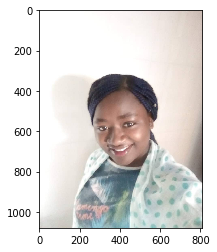

In [14]:
plt.imshow(my_image)

In [15]:
image.imsave('saphir_Picture.png',my_image)

In [24]:
def segmentImage(image,k):
    (h1, w1) = image.shape[:2]
    image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    image = image.reshape((image.shape[0] * image.shape[1], 3))
    clt = KMeans(n_clusters = k)
    labels = clt.fit_predict(image)
    quant = clt.cluster_centers_.astype("uint8")[labels]
    quant = quant.reshape((h1, w1, 3))
    image = image.reshape((h1, w1, 3))
    quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
    image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)
    cv2.imwrite('generated.jpg', quant)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    return quant

In [35]:
segmentedImage = segmentImage(my_image,17)

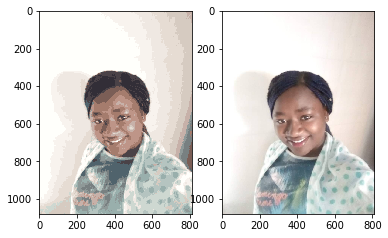

In [34]:
#plt.imshow(segmentedImage)
axe = plt.subplot(1,2,1)
axe.imshow(segmentedImage)
axe = plt.subplot(1,2,2)
axe.imshow(my_image)